2024-06-04 06:37:42.310738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 06:37:42.310839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 06:37:42.436495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 962 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/31 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5208 - loss: 116.5336  

I0000 00:00:1717483104.780817     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717483104.805582     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/31 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7528 - loss: 113.3362

W0000 00:00:1717483146.644867     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717483156.415714     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.7599 - loss: 113.0298 - val_accuracy: 0.5000 - val_loss: 102.9355
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8671 - loss: 100.2645 - val_accuracy: 0.5000 - val_loss: 92.1084
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8950 - loss: 89.5717 - val_accuracy: 0.6625 - val_loss: 82.2283
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 990ms/step - accuracy: 0.9372 - loss: 79.9037 - val_accuracy: 0.9708 - val_loss: 73.6032
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8886 - loss: 71.8417 - val_accuracy: 0.7625 - val_loss: 66.4627
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 985ms/step - accuracy: 0.9029 - loss: 64.8840 - val_accuracy: 0.6333 - val_loss: 60.6668
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 984ms/step - accuracy: 0.9001 - loss: 59.1461 - val_accuracy: 0.8375 - val_loss: 55.1012
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9334 - loss: 53.8852 - val_accuracy: 0.

W0000 00:00:1717483875.609580     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Test Accuracy: 0.9666666388511658
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 634ms/step

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.94      1.00      0.97        60

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


Confusion Matrix:

[[56  4]
 [ 0 60]]


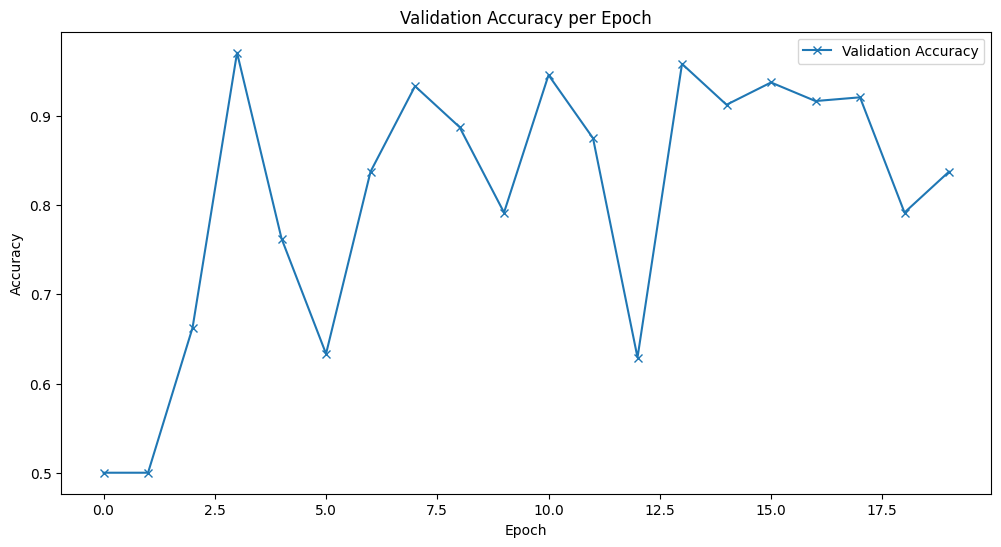

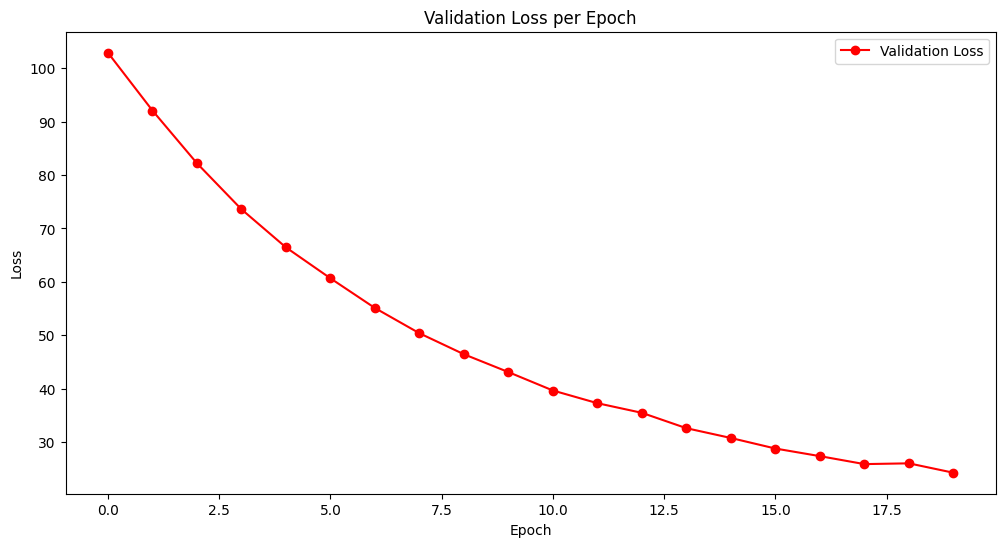

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load BCG TF image dataset with augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset/MM_project/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset/MM_project/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/MM_project/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Define AlexNet model with Batch Normalization and adjusted L2 Regularization
def alexnet(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(256, (5, 5), padding="same", activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Conv2D(384, (3, 3), padding="same", activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), padding="same", activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    x = Dropout(0.7)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# Create AlexNet model
model = alexnet(input_shape=(224, 224, 3))

# Adjust optimizer and learning rate scheduler
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,  # Reduced initial learning rate
    decay_steps=100000,
    decay_rate=0.9,  # More aggressive decay rate
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

epochs = 20  # Increased number of training epochs

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy}")

predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).astype(int).flatten()
true_classes = test_generator.classes

# Classification report and confusion matrix
print(f"\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes))
print(f"\nConfusion Matrix:\n")
print(confusion_matrix(true_classes, predicted_classes))

# Separate the training and validation data
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(val_accuracy, marker='x', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.legend()
plt.show()

# Plot validation loss
plt.figure(figsize=(12, 6))
plt.plot(val_loss, marker='o', color='r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss per Epoch')
plt.legend()
plt.show()
